In [12]:
%matplotlib inline

from IPython.html import widgets
from IPython.html.widgets import interact, IntSlider, FloatSlider

from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

import camera_calibration as cc
import threshold as th


def i_slider(value):
    return IntSlider(min=0, max=255, value=value)

def ksize_slider(value):
    return IntSlider(min=1, max=31, step=2, value=value)

def dir_slider(value):
    return FloatSlider(min=0, max=np.pi/2, value=value)

def thresh(img, thresh_min, thresh_max):
    ret = np.zeros_like(img)
    ret[(img >= thresh_min) & (img <= thresh_max)] = 1
    return ret


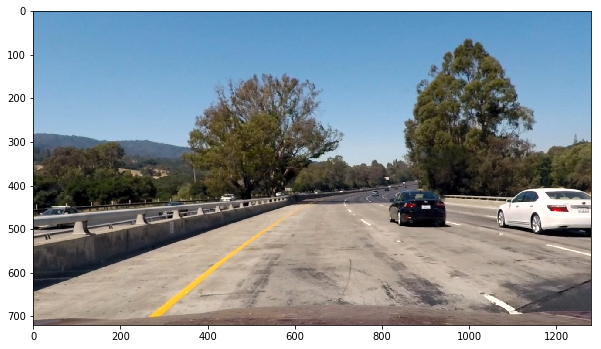

In [13]:
path = 'test_images/test1.jpg'

img_size = (1280, 720)
objpoints, imgpoints = cc.load_corners()
mtx, dist = cc.calibrate_camera(objpoints, imgpoints, img_size)

image = cv2.imread(path)
image = cv2.undistort(image, mtx, dist, None, mtx)
plt.figure(figsize=(10,10))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)


<function __main__.interactive_mask_grad>

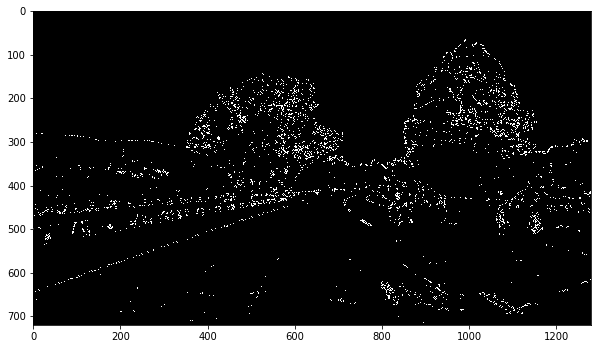

In [22]:
def interactive_mask_grad(gradx_low, gradx_high, grady_low, grady_high):
    gradx = th.abs_sobel_thresh(image, orient='x', thresh=(gradx_low, gradx_high))
    grady = th.abs_sobel_thresh(image, orient='y', thresh=(grady_low, grady_high))

    combined = np.zeros_like(gradx)
    combined[((gradx == 1) & (grady == 1))] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(combined,cmap='gray')

interact(interactive_mask_grad,\
         gradx_low=i_slider(20), gradx_high=i_slider(120),\
         grady_low=i_slider(20), grady_high=i_slider(80))


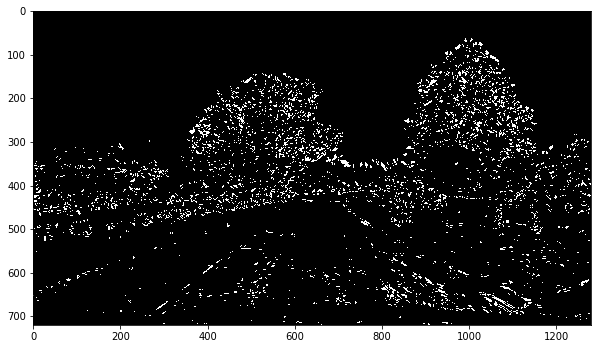

In [23]:
def interactive_mask_mag_dir(mag_ksize, mag_low, mag_high, dir_ksize, dir_low, dir_high):
    mag_binary = th.mag_thresh(image, sobel_kernel=mag_ksize, thresh=(mag_low, mag_high))
    dir_binary = th.dir_threshold(image, sobel_kernel=dir_ksize, thresh=(dir_low, dir_high))

    combined = np.zeros_like(mag_binary)
    combined[((mag_binary == 1) & (dir_binary == 1))] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(combined,cmap='gray')

interact(interactive_mask_mag_dir,\
         mag_ksize=ksize_slider(9), mag_low=i_slider(30), mag_high=i_slider(100),\
         dir_ksize=ksize_slider(11), dir_low=dir_slider(0.7), dir_high=dir_slider(1.2))


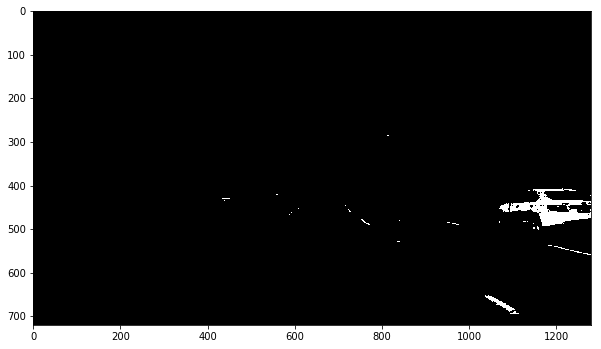

In [20]:

def interactive_mask_color(h_low, h_high, l_low, l_high, s_low, s_high):
    combined = np.zeros((image.shape[0], image.shape[1]))

    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]

    t_H = thresh(H,h_low, h_high)
    t_L = thresh(L,l_low, l_high)
    t_S = thresh(S,s_low, s_high)

    combined[(t_H==1) & (t_L==1) & (t_S==1)] = 1
    
    plt.figure(figsize=(10,10))
    plt.imshow(combined,cmap='gray')
    
# white & yellow
interact(interactive_mask_color,\
         h_low=i_slider(0), h_high=i_slider(255),\
         l_low=i_slider(200), l_high=i_slider(255),\
         s_low=i_slider(130), s_high=i_slider(255)\
        )
